In [157]:
import os
import pandas as pd

In [221]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydeni.csv"))

In [222]:
df['week'] = df.apply(lambda row: f"""{row["rok"]}-{row["tyden"]}""", axis=1)

In [223]:
df.sample(5)

,Unnamed: 0,hitparada,rok,tyden,pozice,track,interpret,interpret_hlavni,vydavatel,week
22664,22764,CZ - RADIO - TOP 100,2010,21,65,Stonka,Kristina,Kristina,Universal Music,2010-21
28836,28936,CZ - RADIO - TOP 100,2011,33,37,DigiHrách,Kryštof / Xindl X,Kryštof,Warner Music,2011-33
4388,4488,CZ - RADIO - TOP 100,2006,44,89,Sorry,Madonna,Madonna,Warner Music,2006-44
21866,21966,CZ - RADIO - TOP 100,2010,13,67,Paparazzi,Lady Gaga,Lady Gaga,Universal Music,2010-13
84742,89942,CZ - RADIO - TOP 100,2022,31,43,Dvě srdce vejpůl,Chinaski,Chinaski,Brainzone,2022-31


## Písně, které se objevily v nejvíce…

### …letech

In [224]:
df.groupby(["interpret","track"])["rok"].nunique().nlargest(20)

interpret                track                          
Wham!                    Last Christmas                     12
Billy Mack               Christmas Is All Around            11
Mariah Carey             All I Want For Christmas Is You    11
Václav Neckář & Umakart  Půlnoční                           11
Janek Ledecký            Sliby se maj plnit o Vánocích      10
John Lennon              Happy Xmas (War Is Over)           10
Queen                    Thank God It´s Christmas           10
Lucie                    Medvídek                            9
Dan Bárta                Na nebi svítí                       7
Guru Josh Project        Infinity 2008                       7
Katy Perry               Hot ´N´ Cold                        7
Mandrage                 Hledá se žena                       7
Michal Hrůza             Pro Emu                             7
Olga Lounová             Jsem optimista                      7
All American Rejects     Gives You Hell                      

### …týdnech

In [225]:
df.groupby(["interpret","track"])["week"].nunique().nlargest(50)

interpret                          track                              
Karel Gott/Charlotte Ella Gottová  Srdce nehasnou                         179
Mirai                              Když nemůžeš, tak přidej               175
Mandrage                           Motýli                                 169
Michal Hrůza                       Pro Emu                                164
Mirai                              Chci tančit                            150
Marek Ztracený                     Naše cesty                             149
Mirai                              OTCHI                                  140
Slza                               Na srdci (feat. Celeste Buckingham)    139
Chinaski                           Láska a data                           137
Marek Ztracený                     Tak se nezlob (Podpantoflák)           133
Kelly Clarkson                     Stronger (What Doesn´t Kill You)       129
O5 & Radeček                       BRA3                                

In [226]:
df[df['pozice'] <= 5].groupby(["interpret","track"])["week"].nunique().nlargest(50)

interpret                       track                     
Mirai                           Vedle tebe usínám             33
Ed Sheeran                      Bad Habits                    31
Mirai                           I přes to všechno             29
Chinaski                        Slovenský klín                28
Miley Cyrus                     Flowers                       28
Ava Max                         Kings & Queens                26
Xindl X & Mirka Miškechová      Cudzinka v tvojej zemi        25
Jelen                           Ještě jednu noc               24
Mirai                           Když nemůžeš, tak přidej      24
Ava Max                         Sweet but Psycho              23
Xindl X                         V blbým věku                  23
Chinaski                        Láska a data                  22
Kryštof                         Co bude pak                   22
Chinaski                        Měl bych si boty zout         21
Kryštof                        

## Interpreti s nejvíce písněmi

### …v top 100

In [227]:
df.groupby("interpret")["track"].nunique().nlargest(10)

interpret
Chinaski            27
Kryštof             26
P!Nk                26
Support Lesbiens    25
Xindl X             24
Ed Sheeran          23
Marek Ztracený      23
Rihanna             23
Imagine Dragons     22
Onerepublic         22
Name: track, dtype: int64

### …v top 10

In [228]:
df[df['pozice'] <= 10].groupby("interpret")["track"].nunique().nlargest(10)

interpret
P!Nk               20
Chinaski           19
Kryštof            19
Ed Sheeran         14
Imagine Dragons    14
Marek Ztracený     14
Mirai              14
Rihanna            13
Lady Gaga          11
Katy Perry         10
Name: track, dtype: int64

## Letos jsem to opravdu nečekal

<Axes: xlabel='rok'>

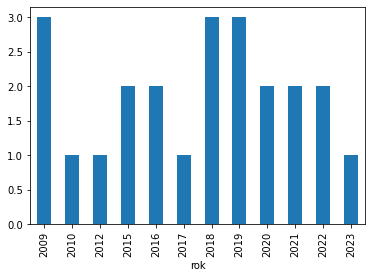

In [229]:
df[df['interpret'].str.lower().str.contains('gott',na=False)].groupby(['rok'])['track'].nunique().plot.bar()

<Axes: xlabel='rok'>

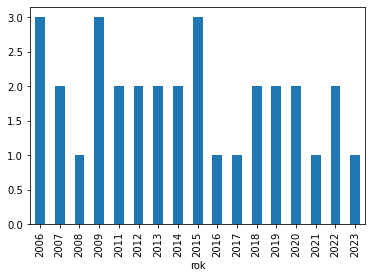

In [230]:
df[df['interpret'].str.lower().str.contains('žbirk',na=False)].groupby(['rok'])['track'].nunique().plot.bar()

## Vánoční písně

In [168]:
dfm = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_mesicni.csv"))

In [169]:
pd.Series(dfm.groupby(['track','interpret'])['rok'].nunique() / dfm.groupby(['track','interpret'])['mesic'].nunique()).sort_values(ascending=False).head(20)

track                                            interpret                        
Vánoce na míru                                   Ewa Farna                            5.0
Půlnoční                                         Václav Neckář & Umakart              5.0
Last Christmas                                   Wham!                                5.0
Sliby se maj plnit o Vánocích                    Janek Ledecký                        4.0
Christmas Is All Around                          Billy Mack                           4.0
All I Want For Christmas Is You                  Mariah Carey                         3.0
Happy Xmas (War Is Over)                         John Lennon                          3.0
Medvídek                                         Lucie                                2.0
Thank God It´s Christmas                         Queen                                2.0
Merry Christmas                                  Ed Sheeran & Elton John              2.0
Vánoční          

In [170]:
vanocni = ['Last Christmas','Christmas Is All Around','All I Want For Christmas Is You','Půlnoční','Sliby se maj plnit o Vánocích','Happy Xmas (War Is Over)','Thank God It´s Christmas','Christmas Is All Around','Merry Christmas','Vánoční']

<Axes: xlabel='tyden'>

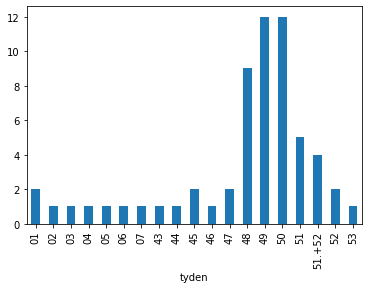

In [171]:
df[df['track'].isin(vanocni)].groupby("tyden")['rok'].nunique().plot.bar()

43 = konec října  
48 = konec listopadu

todo: co se na Vánoce nehraje

In [232]:
df[df['track'].isin(vanocni)].groupby(['interpret','track'])['rok'].min().nsmallest(50)

interpret                track                          
Wham!                    Last Christmas                     2008
Billy Mack               Christmas Is All Around            2011
Janek Ledecký            Sliby se maj plnit o Vánocích      2011
Mariah Carey             All I Want For Christmas Is You    2011
Václav Neckář & Umakart  Půlnoční                           2011
John Lennon              Happy Xmas (War Is Over)           2012
Queen                    Thank God It´s Christmas           2012
Jelen                    Vánoční                            2017
Natálie Grossová         Vánoční                            2017
Kryštof/Karel Gott       Vánoční                            2020
Ed Sheeran & Elton John  Merry Christmas                    2021
Name: rok, dtype: int64

## Co mám rád

In [234]:
df[df['interpret'].str.lower().str.contains('williams',na=False)]

,Unnamed: 0,hitparada,rok,tyden,pozice,track,interpret,interpret_hlavni,vydavatel,week
3,103,CZ - RADIO - TOP 100,2006,01,4,Tripping,Robbie Williams,Robbie Williams,Warner Music,2006-01
102,202,CZ - RADIO - TOP 100,2006,02,3,Tripping,Robbie Williams,Robbie Williams,Warner Music,2006-02
203,303,CZ - RADIO - TOP 100,2006,03,4,Tripping,Robbie Williams,Robbie Williams,Warner Music,2006-03
311,411,CZ - RADIO - TOP 100,2006,04,12,Tripping,Robbie Williams,Robbie Williams,Warner Music,2006-04
324,424,CZ - RADIO - TOP 100,2006,04,25,Advertising Space,Robbie Williams,Robbie Williams,Warner Music,2006-04
...,...,...,...,...,...,...,...,...,...,...
84991,90191,CZ - RADIO - TOP 100,2022,33,92,Stay With Me,Calvin Harris & J.Timberlake & Halsey & P.Will...,Calvin Harris,Sony Music,2022-33
85093,90293,CZ - RADIO - TOP 100,2022,34,94,Stay With Me,Calvin Harris & J.Timberlake & Halsey & P.Will...,Calvin Harris,Sony Music,2022-34
85190,90390,CZ - RADIO - TOP 100,2022,35,91,Stay With Me,Calvin Harris & J.Timberlake & Halsey & P.Will...,Calvin Harris,Sony Music,2022-35
85275,90475,CZ - RADIO - TOP 100,2022,36,76,Stay With Me,Calvin Harris & J.Timberlake & Halsey & P.Will...,Calvin Harris,Sony Music,2022-36


In [236]:
df[df['interpret'].str.lower().str.contains('pharrell wi',na=False)]

,Unnamed: 0,hitparada,rok,tyden,pozice,track,interpret,interpret_hlavni,vydavatel,week
40845,40945,CZ - RADIO - TOP 100,2013,51,46,Happy,Pharrell Williams,Pharrell Williams,Sony Music,2013-51
40930,41030,CZ - RADIO - TOP 100,2014,01,31,Happy,Pharrell Williams,Pharrell Williams,Sony Music,2014-01
41026,41126,CZ - RADIO - TOP 100,2014,02,27,Happy,Pharrell Williams,Pharrell Williams,Sony Music,2014-02
41113,41213,CZ - RADIO - TOP 100,2014,03,14,Happy,Pharrell Williams,Pharrell Williams,Sony Music,2014-03
41210,41310,CZ - RADIO - TOP 100,2014,04,11,Happy,Pharrell Williams,Pharrell Williams,Sony Music,2014-04
...,...,...,...,...,...,...,...,...,...,...
61331,61431,CZ - RADIO - TOP 100,2017,52,32,Feels,Calvin Harris & Pharrell Williams & Katy Perry,Calvin Harris,Sony Music,2017-52
61441,61841,CZ - RADIO - TOP 100,2018,01,42,Feels,Calvin Harris & Pharrell Williams & Katy Perry,Calvin Harris,Sony Music,2018-01
61569,61969,CZ - RADIO - TOP 100,2018,02,70,Feels,Calvin Harris & Pharrell Williams & Katy Perry,Calvin Harris,Sony Music,2018-02
61685,62085,CZ - RADIO - TOP 100,2018,03,86,Feels,Calvin Harris & Pharrell Williams & Katy Perry,Calvin Harris,Sony Music,2018-03


In [219]:
df[df['interpret'].str.lower().str.contains('nick cav',na=False)]

,Unnamed: 0,hitparada,rok,tyden,pozice,track,interpret,interpret_hlavni,vydavatel,week
